In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Đọc dữ liệu ---
df = pd.read_csv(r"C:\Users\Admin\Desktop\BTL_BigData\data\dataset_1761666182405\ecommerce_dataset_updated.csv")

# Hiển thị thông tin cơ bản
print("Tổng quan dữ liệu:")
print(df.info())

print("\nThống kê mô tả:")
print(df.describe())

print("\n5 dòng đầu tiên:")
print(df.head())

👀 Tổng quan dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None

📊 Thống kê mô tả:
       Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  3660.000000   3660.000000       3660.000000
mean    254.800675     18.825137        206.906579
std     141.682621     14.731338        122.687844
min      10.090000      0.000000          5.890000
25%     134.012500      5.000000        104.512500
50%     2

In [6]:
# --- 2. Kiểm tra dữ liệu bị thiếu ---
print("\n🔍 Số lượng giá trị bị thiếu:")
print(df.isnull().sum())


🔍 Số lượng giá trị bị thiếu:
User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


In [7]:
# --- 3. Xử lý dữ liệu thiếu ---
df = df.fillna({
    'Discount': 0,
    'Payment_Method': 'Unknown'
})
df.drop_duplicates(inplace=True)

In [8]:
# --- 4. Chuẩn hóa dữ liệu ngày tháng ---
if 'OrderDate' in df.columns:
    df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

In [9]:
# --- 5. Tạo cột phụ trợ ---
if 'OrderDate' in df.columns:
    df['Month'] = df['OrderDate'].dt.month
    df['Year'] = df['OrderDate'].dt.year

In [10]:
# --- 6. Kiểm tra dữ liệu sau xử lý ---
print("\n✅ Sau khi làm sạch:")
print(df.info())
print("\n📊 Thống kê sau xử lý:")
print(df.describe())


✅ Sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None

📊 Thống kê sau xử lý:
       Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  3660.000000   3660.000000       3660.000000
mean    254.800675     18.825137        206.906579
std     141.682621     14.731338        122.687844
min      10.090000      0.000000          5.890000
25%     134.012500      5.000000        104.512500
50%  

In [11]:
# --- 7. Lưu dữ liệu sạch ---
df.to_csv("../data/ecommerce_cleaned.csv", index=False)
print("\n💾 Dữ liệu sạch đã lưu thành công tại: data/ecommerce_cleaned.csv")


💾 Dữ liệu sạch đã lưu thành công tại: data/ecommerce_cleaned.csv


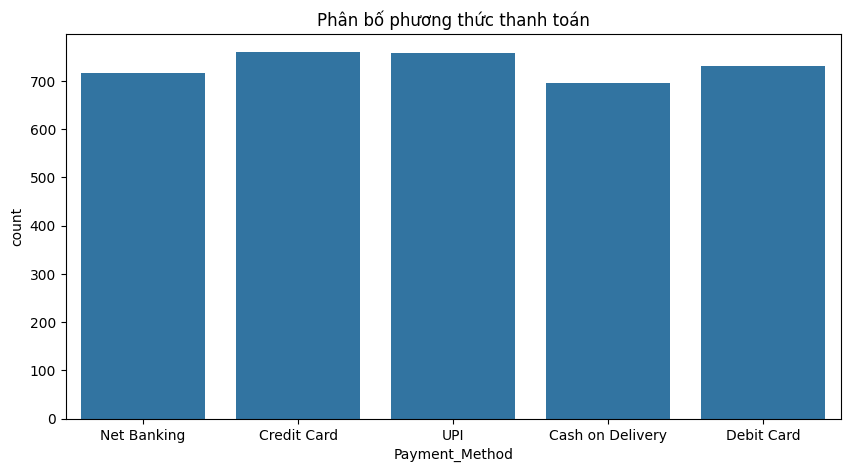

In [12]:
# --- 8. Biểu đồ tổng quan ---
plt.figure(figsize=(10,5))
sns.countplot(x='Payment_Method', data=df)
plt.title("Phân bố phương thức thanh toán")
plt.show()

if 'TotalPrice' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['TotalPrice'], bins=30, kde=True)
    plt.title("Phân bố giá trị đơn hàng (TotalPrice)")
    plt.show()

In [2]:
import pandas as pd
import numpy as np
import os

# --- 1. Đọc dữ liệu gốc ---
df = pd.read_csv(r"C:\Users\Admin\Desktop\BTL_BigData\data\dataset_1761666182405\ecommerce_dataset_updated.csv")
print("✅ Đã đọc dữ liệu thành công!")
print("Kích thước dữ liệu:", df.shape)
print("-" * 50)

# --- 2. Kiểm tra giá trị thiếu ---
print("🔍 Số giá trị thiếu theo cột:\n", df.isnull().sum())
print("-" * 50)

# Nếu có NaN ở Discount (%) thì thay = 0
if 'Discount (%)' in df.columns:
    df['Discount (%)'] = df['Discount (%)'].fillna(0)

# --- 3. Chuẩn hóa kiểu dữ liệu ---
# Đảm bảo cột tồn tại trước khi chuyển kiểu
for col in ['Price (Rs.)', 'Final_Price(Rs.)']:
    if col in df.columns:
        df[col] = df[col].astype(float)

if 'Purchase_Date' in df.columns:
    df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# --- 4. Làm sạch dữ liệu text ---
for col in ['Category', 'Payment_Method']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# --- 5. Tạo cột TotalPrice nếu chưa có ---
if 'TotalPrice' not in df.columns:
    if 'Price (Rs.)' in df.columns and 'Discount (%)' in df.columns:
        df['TotalPrice'] = df['Price (Rs.)'] * (1 - df['Discount (%)'] / 100)

# --- 6. Xóa dòng trùng lặp ---
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"🧹 Đã xóa {before - after} dòng trùng lặp.")
print("-" * 50)

# --- 7. Xuất dữ liệu sạch ---
os.makedirs("data", exist_ok=True)  # <--- thêm dòng này
cleaned_path = os.path.join("data", "ecommerce_cleaned.csv")
df.to_csv(cleaned_path, index=False, encoding='utf-8-sig')
print(f"✅ File cleaned đã được lưu tại: {cleaned_path}")

# --- 8. Kiểm tra nhanh ---
print("\n📊 Thông tin dữ liệu sau khi làm sạch:")
print(df.info())
print("\n📌 5 dòng đầu tiên:")
print(df.head())



✅ Đã đọc dữ liệu thành công!
Kích thước dữ liệu: (3660, 8)
--------------------------------------------------
🔍 Số giá trị thiếu theo cột:
 User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64
--------------------------------------------------
🧹 Đã xóa 0 dòng trùng lặp.
--------------------------------------------------
✅ File cleaned đã được lưu tại: data\ecommerce_cleaned.csv

📊 Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           3660 non-null   object        
 1   Product_ID        3660 non-null   object        
 2   Category          3660 non-null   object        
 3   Price (Rs.)       3660 non-null   float64       
 4   Discount 

Tổng doanh thu: 757278.08


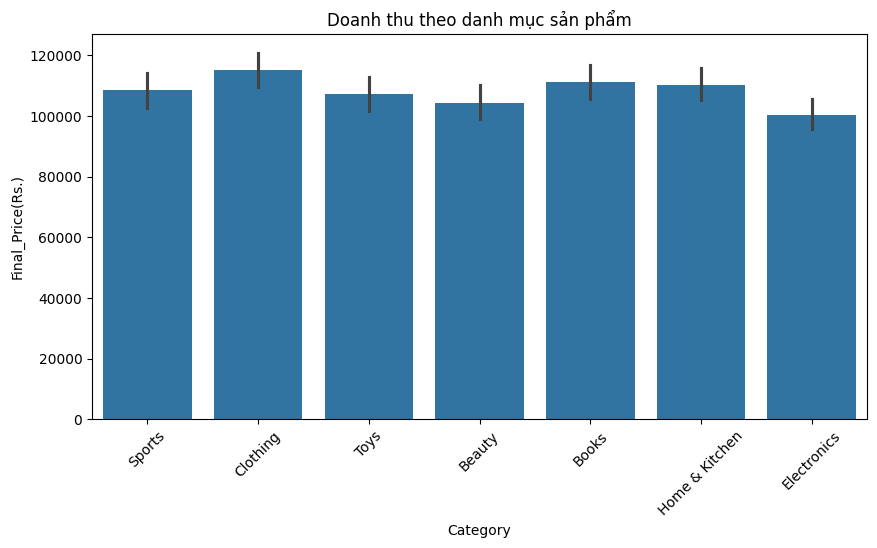

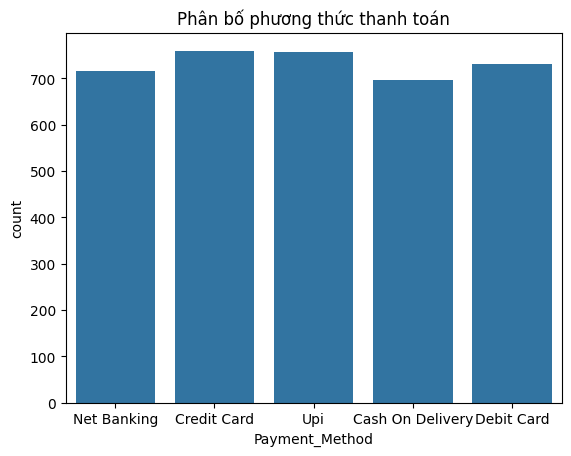

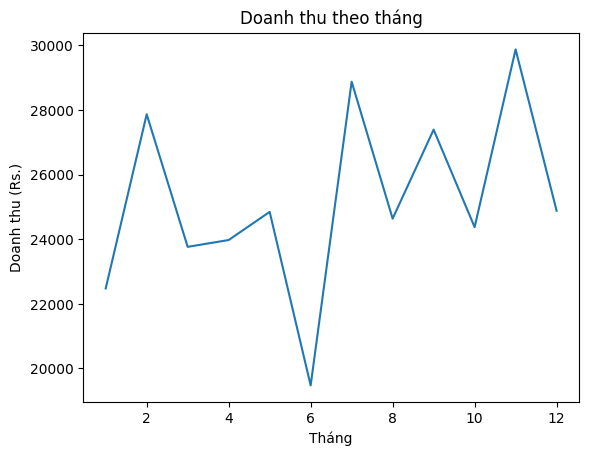

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/ecommerce_cleaned.csv")

# Tổng quan doanh thu
print("Tổng doanh thu:", df["Final_Price(Rs.)"].sum())

# Doanh thu theo danh mục
plt.figure(figsize=(10,5))
sns.barplot(x="Category", y="Final_Price(Rs.)", data=df, estimator=sum)
plt.title("Doanh thu theo danh mục sản phẩm")
plt.xticks(rotation=45)
plt.show()

# Phương thức thanh toán phổ biến
sns.countplot(x="Payment_Method", data=df)
plt.title("Phân bố phương thức thanh toán")
plt.show()

# Doanh thu theo thời gian
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])
df.groupby(df["Purchase_Date"].dt.month)["Final_Price(Rs.)"].sum().plot(kind="line")
plt.title("Doanh thu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (Rs.)")
plt.show()
